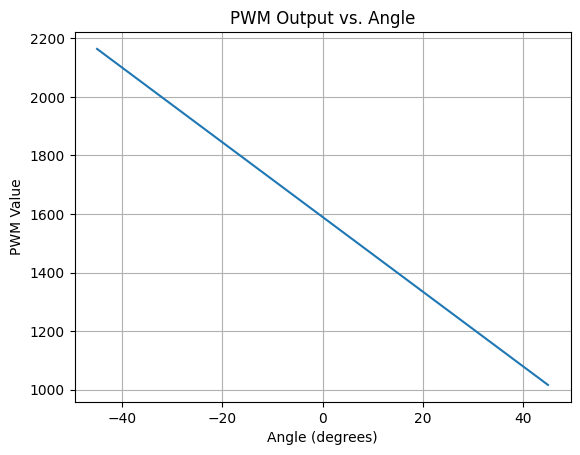

In [1]:
import matplotlib.pyplot as plt

def ConvertAngleToPWM(angle):
    pwm_min = 2164  # PWM value at -45 degrees
    pwm_max = 1016  # PWM value at 45 degrees

    # Calculate the PWM value using linear interpolation
    pwm_value = pwm_min + (angle + 45) * (pwm_max - pwm_min) / 90

    return pwm_value

# Generate PWM values for angles from -45 to 45 degrees
angles = list(range(-45, 46))
pwm_values = [ConvertAngleToPWM(angle) for angle in angles]

# Plot the PWM values vs. angles
plt.plot(angles, pwm_values)
plt.xlabel('Angle (degrees)')
plt.ylabel('PWM Value')
plt.title('PWM Output vs. Angle')
plt.grid(True)
plt.show()



In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Change Mission# here
data = np.genfromtxt("Mission10.csv", delimiter = ",")

Time = data[1:,0] 
Latitude = data[1:,1]
Longitude = data[1:,2]
currentHeading = data[1:,3]
desiredHeading = data[1:,4]
headingError = data[1:,5]
Roll = data[1:,6]
windReading = data[1:,7]
windDirection = data[1:,8]
winchPulseWidth = data[1:,9]
autoRudderAngle = data[1:,10]
distanceToTarget = data[1:,11]

import folium

from IPython.display import display

def plot_path_on_map(latitudes, longitudes):
    # Calculate the center of the path for setting the initial map view
    center_lat = sum(latitudes) / len(latitudes)
    center_lon = sum(longitudes) / len(longitudes)

    # Create a folium map centered on the path
    map_path = folium.Map(location=[center_lat, center_lon], zoom_start=18)

    # Create a polyline to represent the boat's path
    path_points = list(zip(latitudes, longitudes))
    folium.PolyLine(locations=path_points, color='blue').add_to(map_path)
    
    # Add a marker for the constant waypoint
    folium.Marker(location=[38.690660, -9.294800],
                  popup='Waypoint',
                  icon=folium.Icon(color='green', icon='cloud')).add_to(map_path)

    # Display the map
    display(map_path)

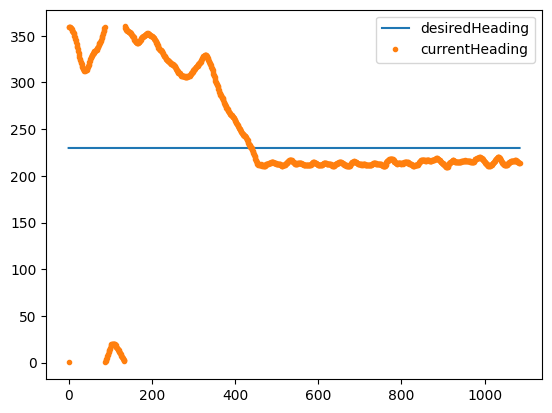

In [3]:
plt.plot(desiredHeading, label="desiredHeading")
plt.plot(currentHeading, ".", label="currentHeading")
#plt.plot(headingError, ".", label="headingError")
plt.legend()

Text(0.5, 1.0, 'Roll')

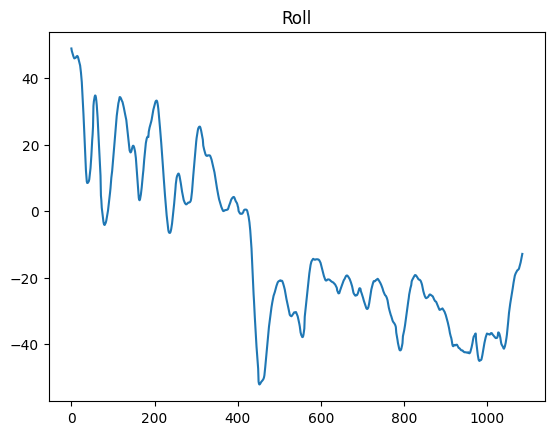

In [4]:
plt.plot(Roll)
plt.title("Roll")

Text(0.5, 1.0, 'Heading Error')

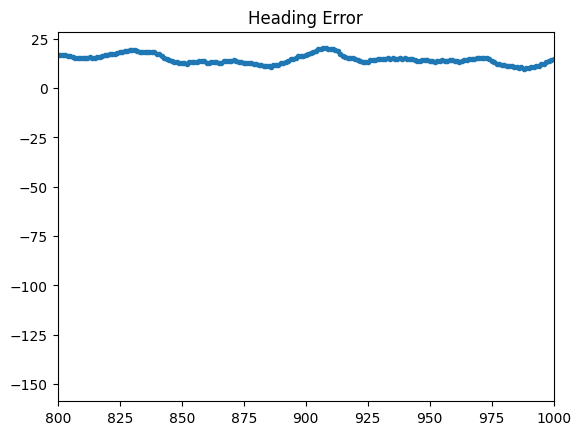

In [5]:
plt.plot(headingError, ".", label="headingError")
plt.xlim(800,1000)
plt.title("Heading Error")

Text(0.5, 1.0, 'Rudder Angle AUTO')

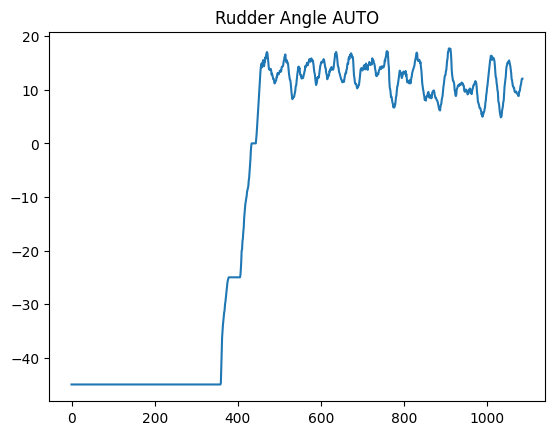

In [6]:
plt.plot(autoRudderAngle)
plt.title("Rudder Angle AUTO")

Text(0.5, 1.0, 'Distance to Target')

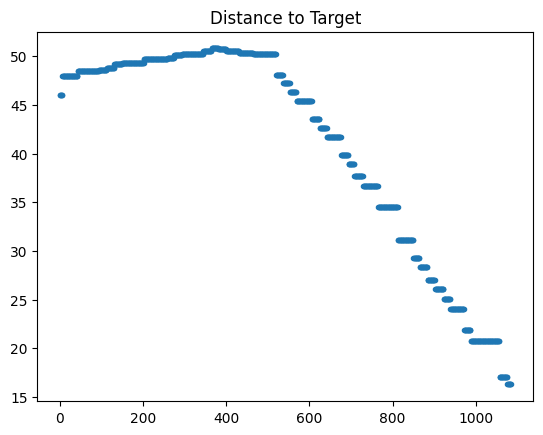

In [7]:
plt.plot(distanceToTarget, ".")
plt.title("Distance to Target")

In [8]:
plot_path_on_map(Latitude, Longitude)

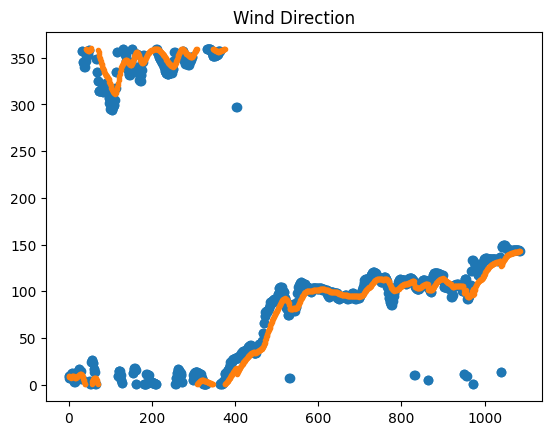

In [9]:
#plt.plot(windDirection, ".")
plt.title("Wind Direction")
plt.plot(windReading, "o")

ALPHA = 0.05  # Smoothing factor (0 < ALPHA < 1)
ema_sin = 0.0
ema_cos = 0.0
import math

def exponential_moving_average(new_angle):
    global ema_sin, ema_cos
    new_angle_rad = math.radians(new_angle)
    ema_sin = (1 - ALPHA) * ema_sin + ALPHA * math.sin(new_angle_rad)
    ema_cos = (1 - ALPHA) * ema_cos + ALPHA * math.cos(new_angle_rad)
    mean_angle_rad = math.atan2(ema_sin, ema_cos)
    mean_angle_deg = math.degrees(mean_angle_rad) % 360  # Correct wraparound issue
    return mean_angle_deg

ema_array = [exponential_moving_average(angle) for angle in windReading]
plt.plot(ema_array, ".")
